1. Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [1]:
import cv2
import numpy as np

In [21]:
img = cv2.imread('137382866.jpg', 0)

# Застосування фільтра Собеля для визначення границь
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobelx**2 + sobely**2)

# Визначення кутів границь
angles = np.arctan2(sobely, sobelx) * 180 / np.pi

# Відображення результатів
cv2.imshow('Image', img)
cv2.imshow('Angles', angles)
cv2.waitKey(0)
cv2.destroyAllWindows()


2. Використовуючи метод густини градієнта (HOG), напишіть код для витягування ознак з зображення.

In [26]:
import cv2 as cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

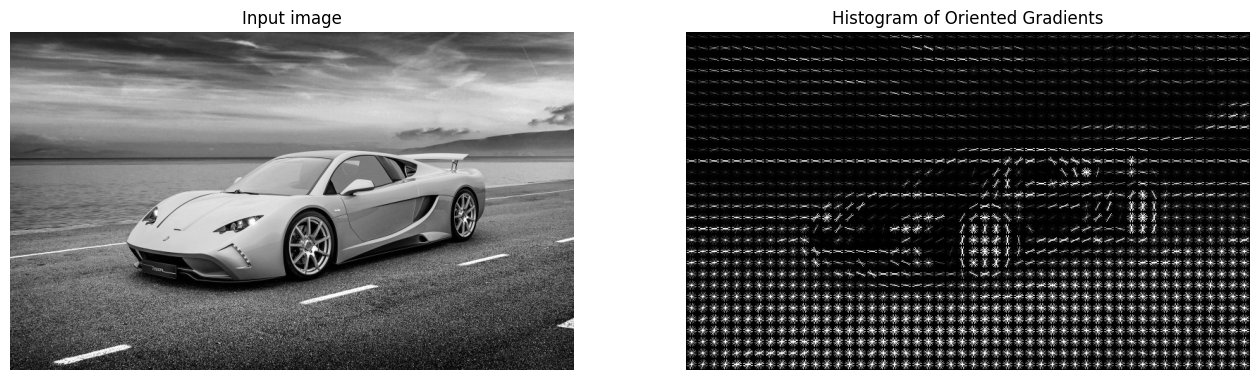

In [28]:
image = cv2.imread('137382866.jpg')

fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray, cmap='gray')
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

3. Завантажте датасет CIFAR-10 та використайте HOG для витягування ознак зображень. Застосуйте будь-який простий класифікатор (наприклад SVM) для класифікації зображень та обчисліть метрики точності, такі як accuracy, precision, recall та F1-score.


In [53]:
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from skimage import color
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

train_data_gray = np.array([cv2.cvtColor(x.reshape(32, 32, 3), cv2.COLOR_BGR2GRAY) for x in x_train])
test_data_gray = np.array([cv2.cvtColor(x.reshape(32, 32, 3), cv2.COLOR_BGR2GRAY) for x in x_test])

train_hog_features = np.array([hog(x, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False) for x in train_data_gray])
test_hog_features = np.array([hog(x, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False) for x in test_data_gray])

pca = PCA(n_components=200, random_state=42)
train_pca_features = pca.fit_transform(train_hog_features)
test_pca_features = pca.transform(test_hog_features)

y_train = y_train.ravel()
y_test = y_test.ravel()

clf = SVC(kernel='rbf')
clf.fit(train_pca_features, y_train)

y_pred = clf.predict(test_pca_features)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-Score:', f1)


Accuracy: 0.626
Precision: 0.6249679364491738
Recall: 0.626
F1-Score: 0.6246989635968799


4. Використайте метод SIFT для витягування ознак з зображень та порівняйте його з методом HOG за допомогою метрик точності.

In [55]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_train])
x_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_test])

sift = cv2.SIFT_create()

sift_train_features = []
sift_train_labels = []
for i in range(len(x_train_gray)):
    keypoints, descriptors = sift.detectAndCompute(x_train_gray[i], None)
    if descriptors is not None:
        sift_train_features.append(descriptors)
        sift_train_labels.append(y_train[i])
sift_test_features = []

sift_test_labels = []
for i in range(len(x_test_gray)):
    keypoints, descriptors = sift.detectAndCompute(x_test_gray[i], None)
    if descriptors is not None:
        sift_test_features.append(descriptors)
        sift_test_labels.append(y_test[i])
max_descriptors = max([len(desc) for desc in sift_train_features])
sift_train_features_arr = np.zeros((len(sift_train_features), max_descriptors, 128))
for i in range(len(sift_train_features)):
    for j in range(len(sift_train_features[i])):
        sift_train_features_arr[i][j] = sift_train_features[i][j]

max_descriptors = max([len(desc) for desc in sift_test_features])
sift_test_features_arr = np.zeros((len(sift_test_features), max_descriptors, 128))
for i in range(len(sift_test_features)):
    for j in range(len(sift_test_features[i])):
        sift_test_features_arr[i][j] = sift_test_features[i][j]

new_sift_train_features_arr = sift_train_features_arr.reshape(len(sift_train_features_arr), -1)
new_sift_test_features_arr = sift_test_features_arr.reshape(len(sift_test_features_arr), -1)

pca = PCA(n_components=200)
train_pca_features_shift = pca.fit_transform(new_sift_train_features_arr)
test_pca_features_shift = pca.fit_transform(new_sift_test_features_arr)

new_sift_train_labels = []
for i in sift_train_labels:
  new_sift_train_labels.append(i[0])

new_sift_test_labels = []
for i in sift_test_labels:
  new_sift_test_labels.append(i[0])

clf = SVC(kernel='rbf')
clf.fit(train_pca_features_shift, new_sift_train_labels)

y_pred = clf.predict(test_pca_features_shift)

accuracy = accuracy_score(new_sift_test_labels, y_pred)
precision = precision_score(new_sift_test_labels, y_pred, average='macro')
recall = recall_score(new_sift_test_labels, y_pred, average='macro')
f1 = f1_score(new_sift_test_labels, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.19216118684843625
Precision: 0.19020875813990445
Recall: 0.19226151812072695
F1-score: 0.18985564912378283
